In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-analytics/Train.csv


# Keşifsel Veri Analizi (EDA - Exploratory Data Analysis)

In [2]:
# kütüphaneleri yükleyelim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# CSV dosyasını oku
df = pd.read_csv("/kaggle/input/customer-analytics/Train.csv")

In [4]:
# İlk 5 satırı görüntüleyelim
df.head()

# Veri kümesinin boyutu
print("Satır sayısı:", df.shape[0])
print("Sütun sayısı:", df.shape[1])

# Sütun adları ve veri tipleri, eksik değer kontrolü
df.info()

# Sayısal sütunlara ait istatistiksel özet
df.describe()


Satır sayısı: 10999
Sütun sayısı: 12
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [5]:
# Her sütundaki eksik değer sayısı
df.isnull().sum()

# Eksik veri yüzdeleri
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

ID                     0.0
Warehouse_block        0.0
Mode_of_Shipment       0.0
Customer_care_calls    0.0
Customer_rating        0.0
Cost_of_the_Product    0.0
Prior_purchases        0.0
Product_importance     0.0
Gender                 0.0
Discount_offered       0.0
Weight_in_gms          0.0
Reached.on.Time_Y.N    0.0
dtype: float64

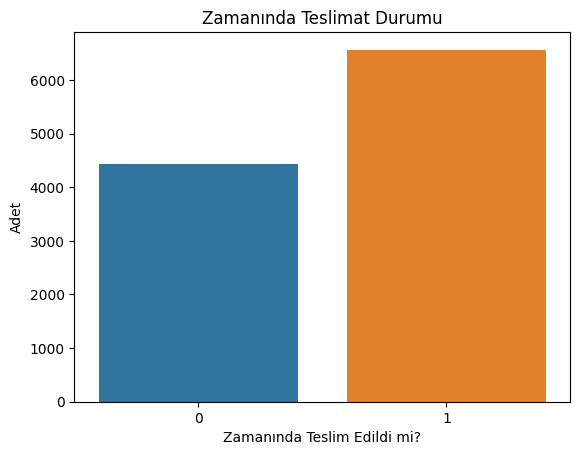

Reached.on.Time_Y.N
1    0.596691
0    0.403309
Name: proportion, dtype: float64

In [6]:
sns.countplot(x='Reached.on.Time_Y.N', data=df)
plt.title("Zamanında Teslimat Durumu")
plt.xlabel("Zamanında Teslim Edildi mi?")
plt.ylabel("Adet")
plt.show()

# Sınıf dengesine bakalım
df['Reached.on.Time_Y.N'].value_counts(normalize=True)


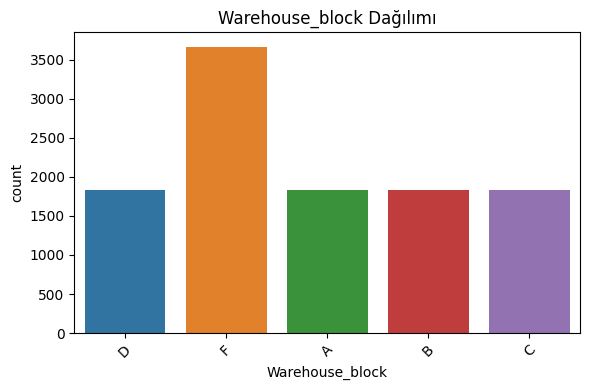

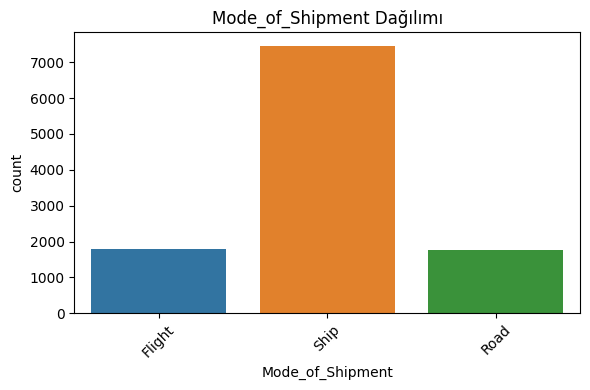

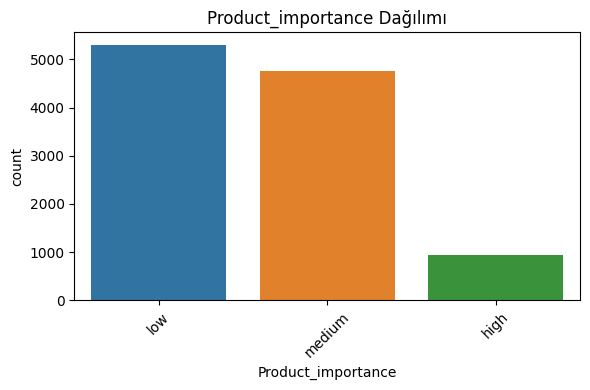

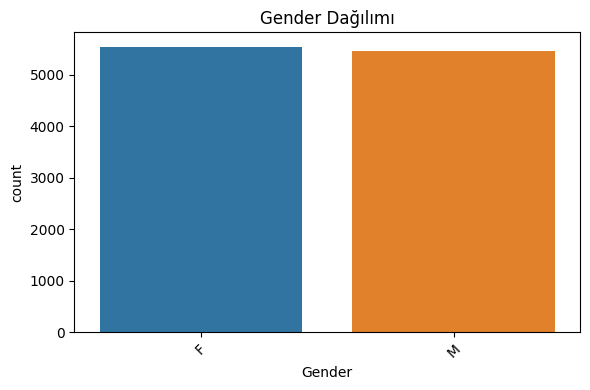

In [7]:
categorical_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f"{col} Dağılımı")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
# Kategorik Değişkenlerin Dağılımı

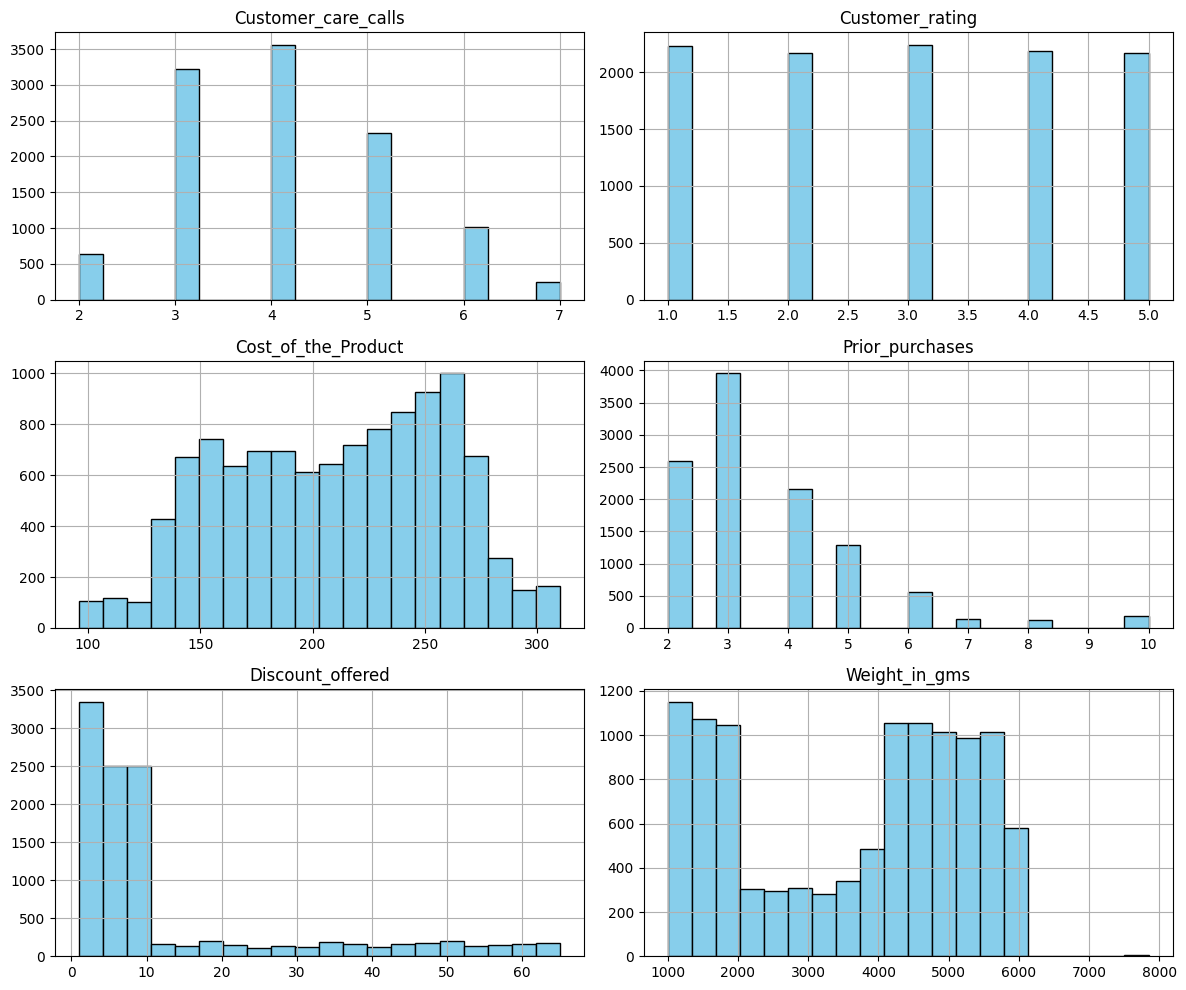

In [8]:
numerical_cols = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
                  'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

df[numerical_cols].hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()
# Sayısal Değişkenlerin Dağılımı - Histogram

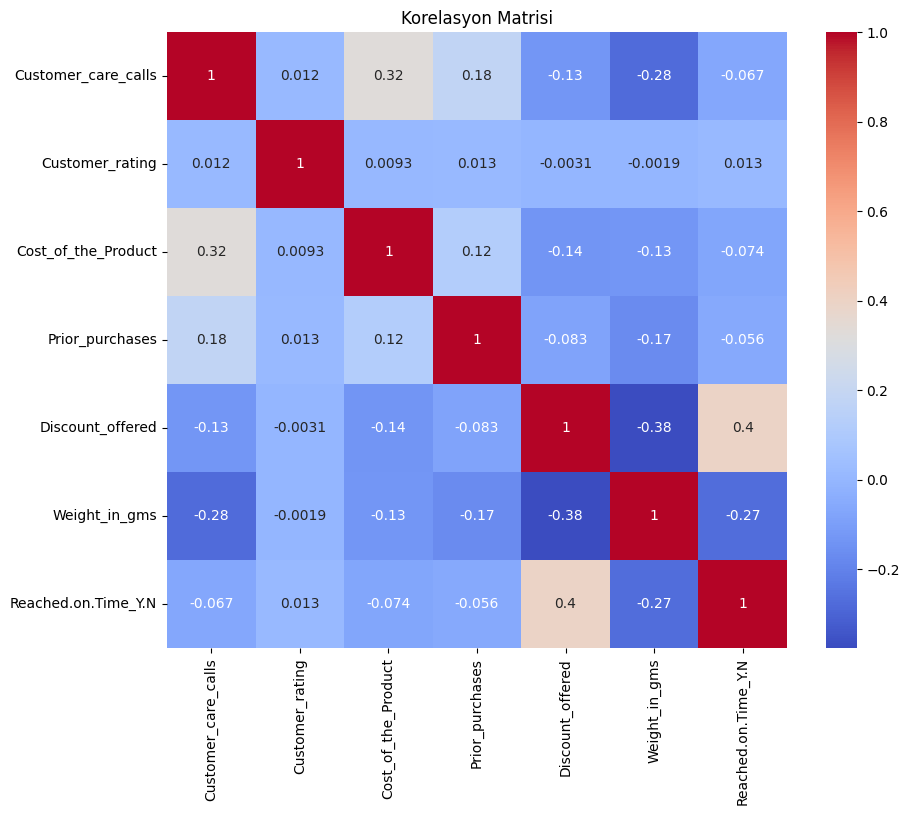

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(df[numerical_cols + ['Reached.on.Time_Y.N']].corr(), annot=True, cmap='coolwarm')
plt.title("Korelasyon Matrisi")
plt.show()
# kolerasyon matrisi

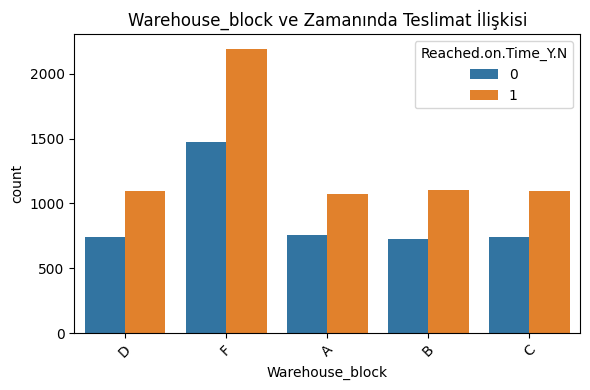

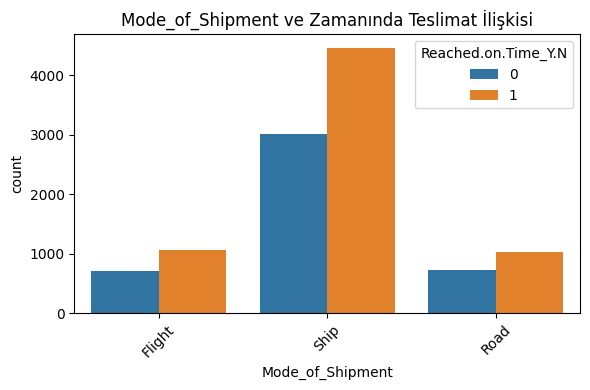

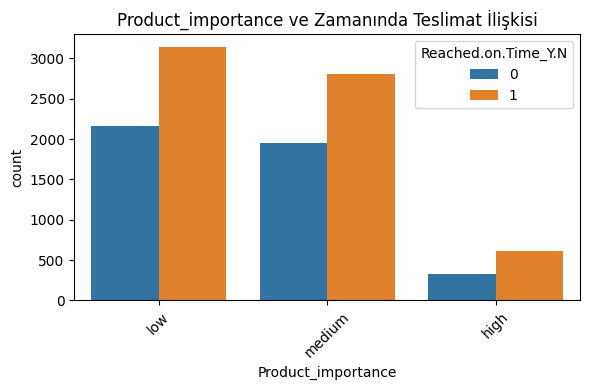

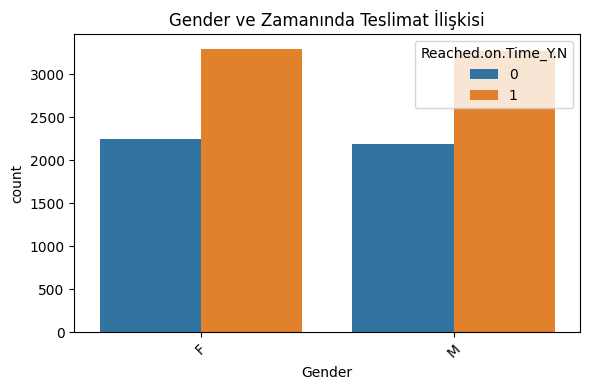

In [10]:
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='Reached.on.Time_Y.N', data=df)
    plt.title(f"{col} ve Zamanında Teslimat İlişkisi")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
# Kategorik Özelliklere Göre Hedef Dağılımı

# Veri Ön İşleme Adımları

In [11]:
# Yapılacaklar:

# ID sütunu çıkarılacak

# sayısal değer ifade etmeyen kategorik sütunlar encoding yapılacak:
  # Label Encoding (ikili olanlarda)
  # One-Hot Encoding (çok sınıflı kategorilerde)

# Girdiler (X) ve hedef (y) ayrılmalı

# Eğitim/test ayrımı yapılmalı (train_test_split)

In [12]:
# gerekli kütüphaneleri dahil ediyorum:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [13]:
df.drop(columns=['ID'], inplace=True)
# id sütunu kaldırdım.

In [14]:
categorical_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
df[categorical_cols].nunique()
# kategorik ayrılmış sütunlar

Warehouse_block       5
Mode_of_Shipment      3
Product_importance    3
Gender                2
dtype: int64

In [15]:
label_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Gender']

le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])
# label encoding.

In [16]:
df = pd.get_dummies(df, columns=['Product_importance'], drop_first=True)

In [17]:
print(df.columns) # sütunları kontrol ettim.

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Gender',
       'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N',
       'Product_importance_low', 'Product_importance_medium'],
      dtype='object')


In [18]:
# algoritma için giriş-çıkış verisini hazırlıyorum:
X = df.drop('Reached.on.Time_Y.N', axis=1)
y = df['Reached.on.Time_Y.N']

In [19]:
# eğitim ve test verileri 80/20 şeklinde bölüyorum.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
#kontrol:
print("Eğitim verisi boyutu:", X_train.shape)
print("Test verisi boyutu:", X_test.shape)
print("Girdi sütunları:", X_train.columns.tolist())

Eğitim verisi boyutu: (8799, 11)
Test verisi boyutu: (2200, 11)
Girdi sütunları: ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Gender', 'Discount_offered', 'Weight_in_gms', 'Product_importance_low', 'Product_importance_medium']


# Algoritma Seçimi & Hiperparametre Optimizasyonu

In [20]:
# Tüm algoritmaları çapraz doğrulamaile test edip çapraz doğrulama yapacağım.
  # 1. Doğrusal Regresyon (Linear Regression)
  # 2. Lojistik Regresyon (Logistic Regression)
  # 3. Karar Ağaçları (Decision Trees)
  # 4. k-En Yakın Komşu (k-Nearest Neighbors - KNN) Sınıflandırıcısı
  # 5. Destek Vektör Makineleri (Support Vector Machines - SVM)

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Veriyi tekrar ayır (önlem amaçlı)
X = df.drop('Reached.on.Time_Y.N', axis=1)
y = df['Reached.on.Time_Y.N']

# Ölçekleme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

log_reg = LogisticRegression(max_iter=1000)
log_scores = cross_val_score(log_reg, X_scaled, y, cv=5, scoring='accuracy')

print("Logistic Regression (ölçekli) - Doğruluk Ortalaması:", np.mean(log_scores))
print("Standart Sapma:", np.std(log_scores))

Logistic Regression (ölçekli) - Doğruluk Ortalaması: 0.5936786969283558
Standart Sapma: 0.13306984708724282


In [23]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_scores = cross_val_score(tree_clf, X_scaled, y, cv=5, scoring='accuracy')

print("Decision Tree (ölçekli) - Doğruluk Ortalaması:", np.mean(tree_scores))
print("Standart Sapma:", np.std(tree_scores))

Decision Tree (ölçekli) - Doğruluk Ortalaması: 0.6227716317334326
Standart Sapma: 0.14082700669706652


In [24]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
rf_scores = cross_val_score(rf_clf, X_scaled, y, cv=5, scoring='accuracy')

print("Random Forest (ölçekli) - Doğruluk Ortalaması:", np.mean(rf_scores))
print("Standart Sapma:", np.std(rf_scores))

Random Forest (ölçekli) - Doğruluk Ortalaması: 0.604584769936748
Standart Sapma: 0.16120649684054728


In [25]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import numpy as np

svm_clf = SVC()
svm_scores = cross_val_score(svm_clf, X_scaled, y, cv=5, scoring='accuracy')

print("SVM (ölçekli) - Doğruluk Ortalaması:", np.mean(svm_scores))
print("Standart Sapma:", np.std(svm_scores))

SVM (ölçekli) - Doğruluk Ortalaması: 0.5727639422878168
Standart Sapma: 0.1556143808483514


In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, X_scaled, y, cv=5, scoring='accuracy')

print("KNN (ölçekli) - Doğruluk Ortalaması:", np.mean(knn_scores))
print("Standart Sapma:", np.std(knn_scores))

KNN (ölçekli) - Doğruluk Ortalaması: 0.6131336557939558
Standart Sapma: 0.1341706897199357


## Decision Tree’yi optimize edelim

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Aday parametreler
param_grid = {
    'criterion': ['gini', 'entropy'],        # Bölme kriteri
    'max_depth': [None, 5, 10, 15, 20],       # Maksimum ağaç derinliği
    'min_samples_split': [2, 5, 10],          # Dallanmak için gereken minimum örnek
    'min_samples_leaf': [1, 2, 4]             # Her yaprakta olması gereken minimum örnek
}

In [28]:
dt = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator=dt,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_scaled, y)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [29]:
print("En iyi parametreler:", grid_search.best_params_)
print("En iyi doğruluk (CV ortalaması):", grid_search.best_score_)

En iyi parametreler: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
En iyi doğruluk (CV ortalaması): 0.6339527884575634


In [30]:
{
  'criterion': 'gini',           # Bölme ölçütü: Gini saflık indeksi
  'max_depth': None,             # Derinlik sınırlaması yok (otomatik optimum derinlik)
  'min_samples_leaf': 4,         # Her yaprakta en az 4 örnek
  'min_samples_split': 2         # Bir düğümün bölünebilmesi için en az 2 örnek
}

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

# Model Değerlendirme

Test Seti Doğruluk (Accuracy): 0.6564

 Sınıflandırma Raporu:

              precision    recall  f1-score   support

           0     0.5728    0.6112    0.5914       895
           1     0.7205    0.6874    0.7035      1305

    accuracy                         0.6564      2200
   macro avg     0.6466    0.6493    0.6474      2200
weighted avg     0.6604    0.6564    0.6579      2200



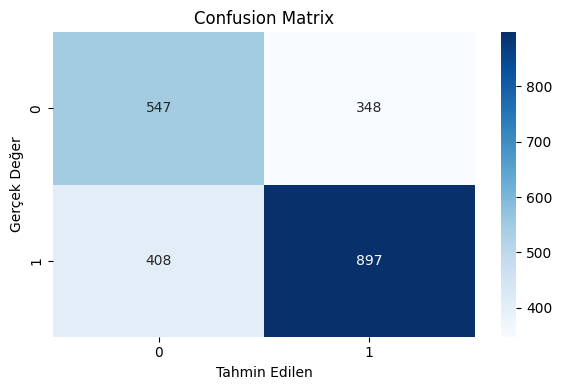

In [31]:
# Gerekli kütüphaneleri içe aktar
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Eğitim ve test setine ayır
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Optimize edilmiş modeli eğit
best_dt = grid_search.best_estimator_
best_dt.fit(X_train, y_train)

# Tahmin yap
y_pred = best_dt.predict(X_test)

# Değerlendirme metriklerini yazdır
print("Test Seti Doğruluk (Accuracy):", round(accuracy_score(y_test, y_pred), 4))
print("\n Sınıflandırma Raporu:\n")
print(classification_report(y_test, y_pred, digits=4))

# Confusion Matrix hesapla ve çiz
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Değer")
plt.tight_layout()
plt.show()
